# 3.4 Classifying movie reviews:
## a binary classification example

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/astrid/opt/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/astrid/opt/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

In [3]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [11]:
#from keras import optimizers
#from tensorflow.keras import optimizers
from tensorflow import keras
from keras import optimizers

model.compile(optimizer="rmsprop",
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer="rmsprop",
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])


In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 14s 49ms/step - loss: 0.6045 - acc: 0.6903 - val_loss: 0.3998 - val_acc: 0.8629
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3357 - acc: 0.9022 - val_loss: 0.3096 - val_acc: 0.8826
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2252 - acc: 0.9323 - val_loss: 0.2935 - val_acc: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1768 - acc: 0.9420 - val_loss: 0.3082 - val_acc: 0.8747
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1437 - acc: 0.9572 - val_loss: 0.2820 - val_acc: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1201 - acc: 0.9649 - val_loss: 0.2933 - val_acc: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0971 - acc: 0.9726 - val_loss: 0.3470 - val_acc: 0.8770
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0874 - 

In [27]:
history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

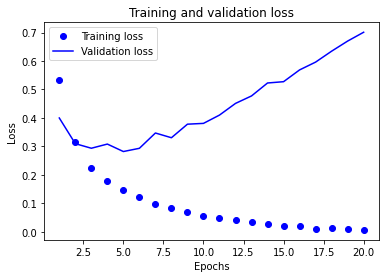

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

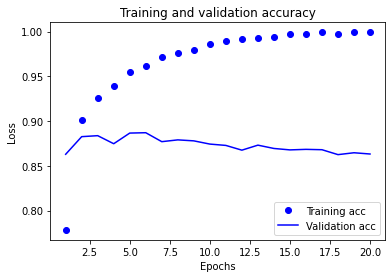

In [33]:
plt.clf()

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5301 - accuracy: 0.7508
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2604 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2021 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3024 - accuracy: 0.8803
